In [93]:
import pandas as pd
df = pd.read_parquet('songs_optimized.parquet')

In [94]:
df.head()

,Artist(s),song,text,Length,emotion,Genre,Album,Release Date,Key,Tempo,...,Good for Morning Routine,Similar Artist 1,Similar Song 1,Similarity Score 1,Similar Artist 2,Similar Song 2,Similarity Score 2,Similar Artist 3,Similar Song 3,Similarity Score 3
0,!!!,Even When the Waters Cold,Friends told her she was better off at the bot...,03:47,sadness,hip hop,Thr!!!er,29th April 2013,D min,105,...,False,Corey Smith,If I Could Do It Again,0.986061,Toby Keith,Drinks After Work,0.983719,Space,Neighbourhood,0.983236
1,!!!,One Girl / One Boy,"Well I heard it, playing soft From a drunken b...",04:03,sadness,hip hop,Thr!!!er,29th April 2013,A# min,117,...,False,Hiroyuki Sawano,BRE@TH//LESS,0.995409,When In Rome,Heaven Knows,0.990905,Justice Crew,Everybody,0.984483
2,!!!,Pardon My Freedom,"Oh my god, did I just say that out loud? Shoul...",05:51,joy,hip hop,Louden Up Now,8th June 2004,A Maj,121,...,False,Ricky Dillard,More Abundantly Medley Live,0.993176,Juliet,Avalon,0.965147,The Jacksons,Lovely One,0.956752
3,!!!,Ooo,[Verse 1] Remember when I called you on the te...,03:44,joy,hip hop,As If,16th October 2015,A min,122,...,False,Eric Clapton,Man Overboard,0.992749,Roxette,Don't Believe In Accidents,0.991494,Tiwa Savage,My Darlin,0.990381
4,!!!,Freedom 15,[Verse 1] Calling me like I got something to s...,06:00,joy,hip hop,As If,16th October 2015,F min,123,...,False,Cibo Matto,Lint Of Love,0.981610,Barrington Levy,Better Than Gold,0.981524,Freestyle,Its Automatic,0.981415


In [95]:
df.dtypes

Artist(s)                         category
song                                object
text                                object
Length                              object
emotion                           category
Genre                             category
Album                             category
Release Date                        object
Key                               category
Tempo                                int64
Loudness (db)                       object
Time signature                    category
Explicit                              bool
Popularity                           uint8
Energy                               uint8
Danceability                         uint8
Positiveness                         uint8
Speechiness                          uint8
Liveness                             uint8
Acousticness                         uint8
Instrumentalness                     uint8
Good for Party                        bool
Good for Work/Study                   bool
Good for Re

In [96]:
#guardar nombre de las canciones, para la validación?
nameSongs = df['song']

In [97]:
#columnas a eliminar que no tienen relevancia para predecir la popularidad
columnas_innecesarias = ['Artist(s)', 'text', 'Similar Artist 1', 'Similar Song 1', 'Similar Artist 2', 'Similar Song 2',
                         'Similar Artist 3', 'Similar Song 3', 'Similarity Score 1', 'Similarity Score 2', 'Similarity Score 3',
                         'song', 'Album']

#eliminar release date??

In [98]:
#eliminar columnas
df.drop(columns = columnas_innecesarias, inplace = True)

In [99]:
df.dtypes

Length                              object
emotion                           category
Genre                             category
Release Date                        object
Key                               category
Tempo                                int64
Loudness (db)                       object
Time signature                    category
Explicit                              bool
Popularity                           uint8
Energy                               uint8
Danceability                         uint8
Positiveness                         uint8
Speechiness                          uint8
Liveness                             uint8
Acousticness                         uint8
Instrumentalness                     uint8
Good for Party                        bool
Good for Work/Study                   bool
Good for Relaxation/Meditation        bool
Good for Exercise                     bool
Good for Running                      bool
Good for Yoga/Stretching              bool
Good for Dr

In [100]:
#ver si faltan datos
df.isnull().sum()

Length                            0
emotion                           0
Genre                             0
Release Date                      0
Key                               0
Tempo                             0
Loudness (db)                     0
Time signature                    8
Explicit                          0
Popularity                        0
Energy                            0
Danceability                      0
Positiveness                      0
Speechiness                       0
Liveness                          0
Acousticness                      0
Instrumentalness                  0
Good for Party                    0
Good for Work/Study               0
Good for Relaxation/Meditation    0
Good for Exercise                 0
Good for Running                  0
Good for Yoga/Stretching          0
Good for Driving                  0
Good for Social Gatherings        0
Good for Morning Routine          0
dtype: int64

In [101]:
#en las siguientes líneas de código se van a formatear
#todas las columnas para que tengan entradas numéricas

In [102]:
#convertir duración de la canción a segundos
df['Duration_sec'] = df['Length'].str.split(':').apply(lambda x: int(x[0])*60 + int(x[1]))
df.drop(columns=['Length'], inplace=True)  # eliminar la columna original

In [103]:
#convertir Loudness a valor numérico (quitar db y que no sea object)
df['Loudness (db)'] = df['Loudness (db)'].str.replace('db', '', regex=False).str.strip()
df['Loudness (db)'] = pd.to_numeric(df['Loudness (db)'], errors='coerce')

In [104]:
#confirmar si se hizo bien la conversión
print(f"Valores NaN en Loudness (db): {df['Loudness (db)'].isna().sum()}")

Valores NaN en Loudness (db): 0


In [105]:
print(df['Loudness (db)'].head())


0   -6.85
1   -5.75
2   -6.06
3   -5.42
4   -5.57
Name: Loudness (db), dtype: float64


In [106]:
#convertir columnas booleanas a valor 0 y 1
#identificar las columnas
bool_cols = df.select_dtypes(include='bool').columns
#hacer conversión
df[bool_cols] = df[bool_cols].astype(int)

In [107]:
#ver datos
print(df[bool_cols].head())

   Explicit  Good for Party  Good for Work/Study  \
0         0               0                    0   
1         0               0                    0   
2         0               0                    0   
3         0               0                    0   
4         0               0                    0   

   Good for Relaxation/Meditation  Good for Exercise  Good for Running  \
0                               0                  0                 0   
1                               0                  0                 0   
2                               0                  1                 0   
3                               0                  1                 0   
4                               0                  1                 0   

   Good for Yoga/Stretching  Good for Driving  Good for Social Gatherings  \
0                         0                 0                           0   
1                         0                 0                           0   
2          

In [108]:
df.dtypes

emotion                           category
Genre                             category
Release Date                        object
Key                               category
Tempo                                int64
Loudness (db)                      float64
Time signature                    category
Explicit                             int64
Popularity                           uint8
Energy                               uint8
Danceability                         uint8
Positiveness                         uint8
Speechiness                          uint8
Liveness                             uint8
Acousticness                         uint8
Instrumentalness                     uint8
Good for Party                       int64
Good for Work/Study                  int64
Good for Relaxation/Meditation       int64
Good for Exercise                    int64
Good for Running                     int64
Good for Yoga/Stretching             int64
Good for Driving                     int64
Good for So

In [109]:
#ver cantidad de valores distintos
df['emotion'].nunique()
#df['Genre'].nunique()

13

In [110]:
df['emotion'].value_counts(dropna=False)

emotion
joy          209009
sadness      171078
anger        109678
fear          28097
love          27963
surprise       5592
True             17
Love              3
pink              2
confusion         1
angry             1
interest          1
thirst            1
Name: count, dtype: int64

In [111]:
import numpy as np
#convertir amociones a  minúscula y eliminar espacios
df['emotion'] = df['emotion'].astype(str).str.lower().str.strip()

In [112]:
# mapeo de emociones válidas
emotion_map = {
    'sadness': 'sadness',
    'joy': 'joy',
    'love': 'love',
    'surprise': 'surprise',
    'anger': 'anger',
    'angry': 'anger',
    'fear': 'fear'
}
df['emotion'] = df['emotion'].map(emotion_map).fillna('unknown')

#como solo hay 22 canciones con valores inválidos se eliminan
df = df[df['emotion'] != 'unknown']


In [113]:
print(df['emotion'].value_counts())

emotion
joy         209009
sadness     171078
anger       109679
fear         28097
love         27966
surprise      5592
Name: count, dtype: int64


In [114]:
#hacer one hot encodig para las columnas de tipo category
from sklearn.preprocessing import OneHotEncoder
colTypeCategory = ['emotion', 'Key', 'Time signature']
encoder = OneHotEncoder(sparse_output = False) #retorne un array denso
encoded = encoder.fit_transform(df[colTypeCategory]) #aplicar encoder a las columnas

#convertir el array a un dataframe
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(colTypeCategory))
#eliminar columnas de tipo category
df = df.drop(colTypeCategory, axis=1)
#añadir columnas de encoded_df al df original
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)


In [115]:
df.dtypes

Genre                             category
Release Date                        object
Tempo                                int64
Loudness (db)                      float64
Explicit                             int64
Popularity                           uint8
Energy                               uint8
Danceability                         uint8
Positiveness                         uint8
Speechiness                          uint8
Liveness                             uint8
Acousticness                         uint8
Instrumentalness                     uint8
Good for Party                       int64
Good for Work/Study                  int64
Good for Relaxation/Meditation       int64
Good for Exercise                    int64
Good for Running                     int64
Good for Yoga/Stretching             int64
Good for Driving                     int64
Good for Social Gatherings           int64
Good for Morning Routine             int64
Duration_sec                         int64
emotion_ang

In [116]:
timeSignature_cols = [col for col in df.columns if col.startswith('Time signature')]
print(timeSignature_cols)

['Time signature_1/4', 'Time signature_3/4', 'Time signature_4/4', 'Time signature_5/4', 'Time signature_nan']


In [117]:
key_cols = [col for col in df.columns if col.startswith('Key_')]
print("Categorías de key codificadas:", key_cols)

Categorías de key codificadas: ['Key_A Maj', 'Key_A min', 'Key_A# Maj', 'Key_A# min', 'Key_B Maj', 'Key_B min', 'Key_C Maj', 'Key_C min', 'Key_C# Maj', 'Key_C# min', 'Key_D Maj', 'Key_D min', 'Key_D# Maj', 'Key_D# min', 'Key_E Maj', 'Key_E min', 'Key_F Maj', 'Key_F min', 'Key_F# Maj', 'Key_F# min', 'Key_G Maj', 'Key_G min', 'Key_G# Maj', 'Key_G# min']


In [118]:
emotion_cols = [col for col in df.columns if col.startswith('emotion_')]
print("Categorías de emotion codificadas:", emotion_cols)

Categorías de emotion codificadas: ['emotion_anger', 'emotion_fear', 'emotion_joy', 'emotion_love', 'emotion_sadness', 'emotion_surprise']


In [119]:
#con genre no era conveniente hace One Hot coding, porque creaba una columna por cada
#combinación de géneros que tenía una canción, y se quiere una columna por cada género único
from sklearn.preprocessing import MultiLabelBinarizer #para hacer la conversión

#crear lista con los géneros presentes en el dataset
df['listaGeneros'] = df['Genre'].str.split(',')
#apra usar el codificador
mlb = MultiLabelBinarizer()
#asignación de 0 y 1 por cada lista de géneros en Genre por canción
listaGenreBinario = pd.DataFrame(mlb.fit_transform(df['listaGeneros']),
                             columns=[f'Genre_{g.strip()}' for g in mlb.classes_],
                             index=df.index)
#agregar las columnnas por cada género al df
df = pd.concat([df, listaGenreBinario], axis=1)

#sacar las columnas que no se necesitan
df.drop(columns=['Genre', 'listaGeneros'], inplace=True)

In [120]:
df.dtypes

Release Date           object
Tempo                   int64
Loudness (db)         float64
Explicit                int64
Popularity              uint8
                       ...   
Genre_thrash metal      int64
Genre_trance            int64
Genre_trap              int64
Genre_trip-hop          int64
Genre_worship           int64
Length: 145, dtype: object

In [121]:
genre_cols = [col for col in df.columns if col.startswith('Genre_')]
print(genre_cols)

['Genre_acoustic', 'Genre_alt-country', 'Genre_alternative', 'Genre_alternative rock', 'Genre_ambient', 'Genre_black metal', 'Genre_blues', 'Genre_britpop', 'Genre_chillout', 'Genre_chillwave', 'Genre_christian', 'Genre_classic rock', 'Genre_classical', 'Genre_cloud rap', 'Genre_comedy', 'Genre_country', 'Genre_dance', 'Genre_dancehall', 'Genre_death metal', 'Genre_deathcore', 'Genre_disco', 'Genre_doom metal', 'Genre_dream pop', 'Genre_drum and bass', 'Genre_dub', 'Genre_dubstep', 'Genre_electro', 'Genre_electronic', 'Genre_electropop', 'Genre_emo', 'Genre_emo rap', 'Genre_experimental', 'Genre_folk', 'Genre_funk', 'Genre_garage rock', 'Genre_gospel', 'Genre_grime', 'Genre_grunge', 'Genre_hard rock', 'Genre_hardcore', 'Genre_heavy metal', 'Genre_hip hop', 'Genre_hip-hop', 'Genre_house', 'Genre_indie', 'Genre_indie pop', 'Genre_indie rock', 'Genre_industrial', 'Genre_j-pop', 'Genre_jazz', 'Genre_k-pop', 'Genre_latin', 'Genre_lo-fi', 'Genre_math rock', 'Genre_melodic death metal', 'Genr

In [25]:
print(df.columns.tolist())
print(df.info())

['Release Date', 'Tempo', 'Loudness (db)', 'Explicit', 'Popularity', 'Energy', 'Danceability', 'Positiveness', 'Speechiness', 'Liveness', 'Acousticness', 'Instrumentalness', 'Good for Party', 'Good for Work/Study', 'Good for Relaxation/Meditation', 'Good for Exercise', 'Good for Running', 'Good for Yoga/Stretching', 'Good for Driving', 'Good for Social Gatherings', 'Good for Morning Routine', 'Duration_sec', 'emotion_Love', 'emotion_True', 'emotion_anger', 'emotion_angry', 'emotion_confusion', 'emotion_fear', 'emotion_interest', 'emotion_joy', 'emotion_love', 'emotion_pink', 'emotion_sadness', 'emotion_surprise', 'emotion_thirst', 'Key_A Maj', 'Key_A min', 'Key_A# Maj', 'Key_A# min', 'Key_B Maj', 'Key_B min', 'Key_C Maj', 'Key_C min', 'Key_C# Maj', 'Key_C# min', 'Key_D Maj', 'Key_D min', 'Key_D# Maj', 'Key_D# min', 'Key_E Maj', 'Key_E min', 'Key_F Maj', 'Key_F min', 'Key_F# Maj', 'Key_F# min', 'Key_G Maj', 'Key_G min', 'Key_G# Maj', 'Key_G# min', 'Time signature_1/4', 'Time signature_3

In [26]:
df.drop(columns=['Release Date'], inplace=True)


In [27]:
df

,Tempo,Loudness (db),Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,...,Genre_soul,Genre_soundtrack,Genre_swing,Genre_synthpop,Genre_techno,Genre_thrash metal,Genre_trance,Genre_trap,Genre_trip-hop,Genre_worship
0,105,-6.85,0,40,83,71,87,4,16,11,...,0,0,0,0,0,0,0,0,0,0
1,117,-5.75,0,42,85,70,87,4,32,0,...,0,0,0,0,0,0,0,0,0,0
2,121,-6.06,0,29,89,71,63,8,64,0,...,0,0,0,0,0,0,0,0,0,0
3,122,-5.42,0,24,84,78,97,4,12,12,...,0,0,0,0,0,0,0,0,0,0
4,123,-5.57,0,30,71,77,70,7,10,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551438,140,-10.00,1,31,82,83,19,16,9,39,...,0,0,0,0,0,0,0,0,0,0
551439,128,-9.68,0,29,43,39,26,3,10,54,...,0,0,0,0,0,0,0,0,0,0
551440,75,-4.67,0,21,79,56,41,5,19,0,...,0,0,0,0,0,0,0,0,0,0
551441,126,-3.93,0,5,90,59,69,4,7,27,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#definir x (columnas de entrada) e y (etiqueta) para aplicar el modelo
X = df.drop(columns=['Popularity']) 
y = df['Popularity']  

In [29]:
from sklearn.model_selection import train_test_split

# Dividir datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
print(f"Entrenamiento: {X_train.shape}")
print(f"Prueba: {X_test.shape}")

Entrenamiento: (441154, 150)
Prueba: (110289, 150)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # uSsa todos los núcleos de la CPU
)
#max_depth=None 
#min_samples_split=2

In [34]:
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
y_pred = rf_model.predict(X_test)


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 8.41
RMSE: 11.46
R²: 0.60


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# crear modelo
rf_model = RandomForestRegressor(random_state=42)

# entrenar el modelo
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
#predecir y evaluar
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

#evaluar en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# evaluar el rendimiento
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Resultados del modelo Random Forest:")
print(f" - MAE  (Error Absoluto Medio): {mae:.2f}")
print(f" - RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f" - R²   (Coeficiente de determinación): {r2:.2f}")

In [ ]:
#versión aleatoria para encontrar mejores hiperparámetros
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

scorer = make_scorer(mean_absolute_error, greater_is_better=False)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Probar 20 combinaciones aleatorias
    scoring=scorer,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Mejores hiperparámetros:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mejores hiperparámetros: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 206}


In [ ]:
best_model = random_search.best_estimator_
print 


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"🔍 MAE: {mae:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📊 R² Score: {r2:.2f}")

🔍 MAE: 8.50
📉 RMSE: 11.51
📊 R² Score: 0.59


C:\Users\maria\AppData\Local\Temp\ipykernel_28640\1589759790.py:12: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\maria\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


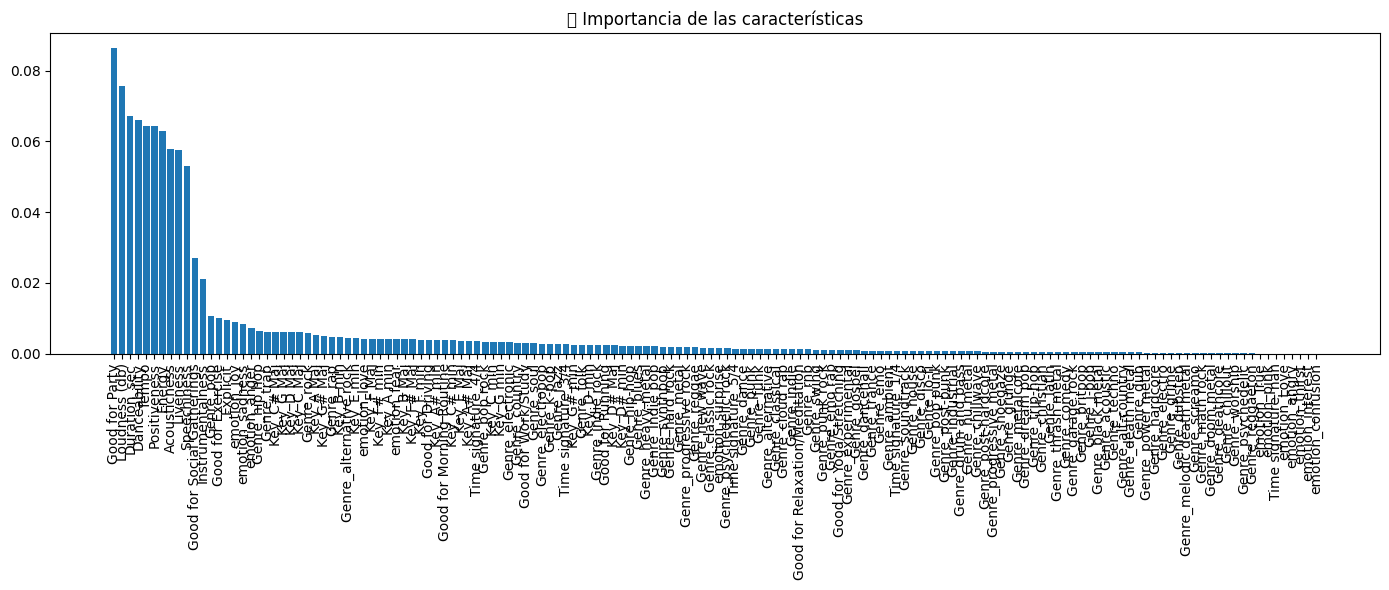

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(14, 6))
plt.title(" Importancia de las características")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

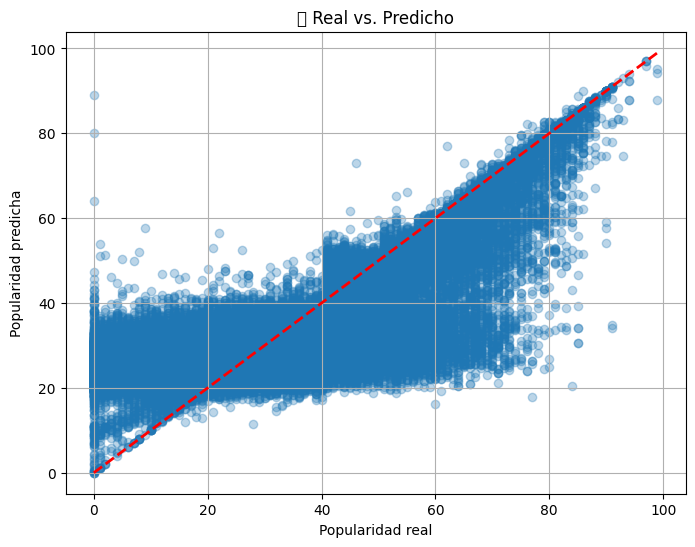

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  
plt.xlabel("Popularidad real")
plt.ylabel("Popularidad predicha")
plt.title(" Real vs. Predicho")
plt.grid(True)
plt.show()

c:\Users\maria\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


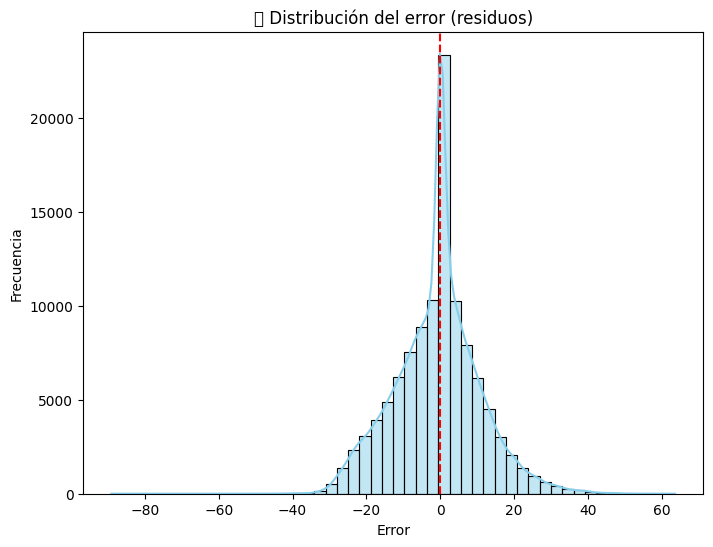

In [39]:
import seaborn as sns

residuos = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuos, bins=50, kde=True, color="skyblue")
plt.title("📉 Distribución del error (residuos)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.axvline(0, color='red', linestyle='--')
plt.show()


In [34]:
import joblib
joblib.dump(best_model, 'modelo_random_forest_popularidad.pkl')

['modelo_random_forest_popularidad.pkl']

In [35]:
modelo = joblib.load('modelo_random_forest_popularidad.pkl')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error

# grilla de hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5]
}

# Modelo base
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# MAE como métrica para la evaluación
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# configurar el GridSearch
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,              # validación cruzada de 3 partes
    verbose=2,         # mostrar progreso
    n_jobs=1          # usar todos los núcleos del procesador
)

# entrenamiento para búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

#mejor configuración encontrada
print("hiperparámetros óptimos:")
print(grid_search.best_params_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


KeyboardInterrupt: 

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Entrenar el modelo
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predecir
y_pred_lr = lr_model.predict(X_test)

In [42]:
# Evaluación
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"📈 Regresión Lineal - MAE: {mae_lr:.2f}")
print(f"📉 Regresión Lineal - RMSE: {rmse_lr:.2f}")
print(f"📊 Regresión Lineal - R² Score: {r2_lr:.2f}")


📈 Regresión Lineal - MAE: 12.47
📉 Regresión Lineal - RMSE: 15.90
📊 Regresión Lineal - R² Score: 0.23


c:\Users\maria\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


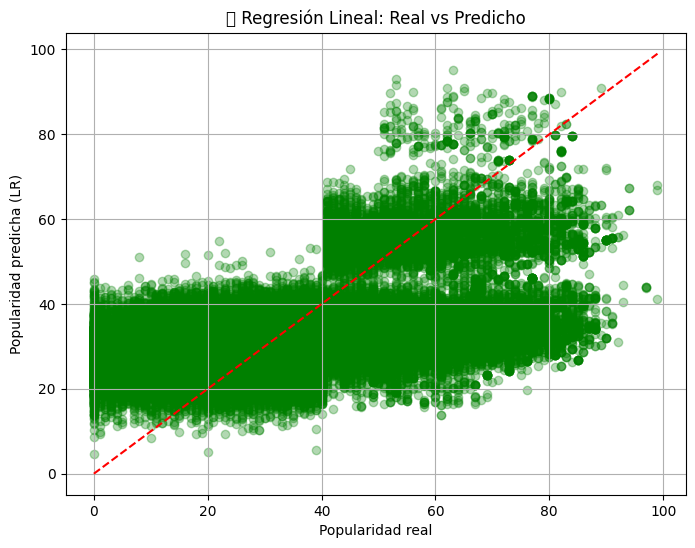

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.3, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Popularidad real")
plt.ylabel("Popularidad predicha (LR)")
plt.title("🔍 Regresión Lineal: Real vs Predicho")
plt.grid(True)
plt.show()


In [44]:
df.corr()

,Tempo,Loudness (db),Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,...,Genre_soul,Genre_soundtrack,Genre_swing,Genre_synthpop,Genre_techno,Genre_thrash metal,Genre_trance,Genre_trap,Genre_trip-hop,Genre_worship
Tempo,1.000000,0.127042,-0.012297,0.009241,0.178311,-0.111885,0.027774,0.009042,0.011173,-0.150245,...,-0.024749,0.000273,-0.011896,0.005868,0.008442,0.016585,0.004018,0.031801,0.001681,0.007503
Loudness (db),0.127042,1.000000,0.145113,0.088321,0.746677,0.112163,0.173352,0.060400,0.084054,-0.543734,...,-0.037582,-0.025622,-0.046702,-0.000312,0.004478,0.028810,-0.008000,0.030360,-0.006239,0.009916
Explicit,-0.012297,0.145113,1.000000,0.004839,0.095786,0.324076,0.028231,0.494210,0.031368,-0.161326,...,-0.075700,-0.011214,-0.015166,-0.056465,-0.019527,-0.005789,-0.011808,0.220518,-0.016094,-0.018298
Popularity,0.009241,0.088321,0.004839,1.000000,0.046765,0.107897,0.080531,-0.080374,-0.055598,-0.061172,...,0.028497,-0.017045,0.005967,0.030038,0.005018,0.003255,-0.010051,0.086715,0.017166,-0.009459
Energy,0.178311,0.746677,0.095786,0.046765,1.000000,-0.007517,0.258198,0.108411,0.177925,-0.672732,...,-0.063810,-0.021941,-0.065452,0.020060,0.010893,0.086177,0.005622,-0.006105,-0.000005,0.011001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Genre_thrash metal,0.016585,0.028810,-0.005789,0.003255,0.086177,-0.087473,-0.044860,0.001090,0.003421,-0.056710,...,-0.012539,-0.005814,-0.005655,-0.009472,-0.002888,1.000000,-0.004851,-0.012285,-0.002513,-0.002076
Genre_trance,0.004018,-0.008000,-0.011808,-0.010051,0.005622,0.007703,-0.000855,-0.008629,0.002184,-0.004364,...,-0.011521,-0.005342,-0.005196,0.017264,0.028968,-0.004851,1.000000,-0.011288,0.010326,-0.001908
Genre_trap,0.031801,0.030360,0.220518,0.086715,-0.006105,0.115530,-0.029058,0.121733,-0.006248,-0.041963,...,-0.024174,-0.013529,-0.013159,-0.022042,-0.006721,-0.012285,-0.011288,1.000000,-0.005848,-0.004832
Genre_trip-hop,0.001681,-0.006239,-0.016094,0.017166,-0.000005,-0.000608,-0.006923,-0.011111,0.001477,-0.004143,...,-0.002837,0.026941,-0.002692,-0.004509,-0.001375,-0.002513,0.010326,-0.005848,1.000000,-0.000989


In [45]:
df.corr()['Popularity']

Tempo                 0.009241
Loudness (db)         0.088321
Explicit              0.004839
Popularity            1.000000
Energy                0.046765
                        ...   
Genre_thrash metal    0.003255
Genre_trance         -0.010051
Genre_trap            0.086715
Genre_trip-hop        0.017166
Genre_worship        -0.009459
Name: Popularity, Length: 151, dtype: float64

In [46]:
df.corr()['Popularity'].sort_values(ascending=False)

Popularity                    1.000000
Good for Party                0.342272
Good for Social Gatherings    0.201440
Genre_pop                     0.108386
Danceability                  0.107897
                                ...   
Time signature_3/4           -0.044823
Genre_hip hop                -0.047196
Liveness                     -0.055598
Acousticness                 -0.061172
Speechiness                  -0.080374
Name: Popularity, Length: 151, dtype: float64

In [47]:
df.corr()['Popularity'].sort_values(ascending=False).to_csv('correlaciones_popularity.csv')

In [49]:
import joblib

# Cargar el modelo guardado
modelo_cargado = joblib.load('modelo_random_forest_popularidad.pkl')

# Usar para predecir (ejemplo)
y_pred = modelo_cargado.predict(X_test)

KeyboardInterrupt: 

In [50]:

modelo_cargado = joblib.load('modelo_random_forest_popularidad.pkl')

y_pred = modelo_cargado.predict(X)
df['Predicted_Popularity'] = y_pred

In [51]:
good_for_cols = [
    'Good for Party', 'Good for Work/Study', 'Good for Relaxation/Meditation',
    'Good for Exercise', 'Good for Running', 'Good for Yoga/Stretching',
    'Good for Driving', 'Good for Social Gatherings', 'Good for Morning Routine'
]

for col in good_for_cols:
    subset = df[df[col] == True]  # Canciones para ese segmento
    if len(subset) > 0:
        mae_segment = mean_absolute_error(subset['Popularity'], subset['Predicted_Popularity'])
        r2_segment = r2_score(subset['Popularity'], subset['Predicted_Popularity'])
        print(f"Segmento '{col}': {len(subset)} canciones")
        print(f"  MAE: {mae_segment:.2f}")
        print(f"  R²: {r2_segment:.2f}\n")

Segmento 'Good for Party': 34084 canciones
  MAE: 1.79
  R²: 0.93

Segmento 'Good for Work/Study': 41320 canciones
  MAE: 5.03
  R²: 0.83

Segmento 'Good for Relaxation/Meditation': 16969 canciones
  MAE: 5.09
  R²: 0.83

Segmento 'Good for Exercise': 103304 canciones
  MAE: 3.15
  R²: 0.94

Segmento 'Good for Running': 29691 canciones
  MAE: 3.07
  R²: 0.94

Segmento 'Good for Yoga/Stretching': 11847 canciones
  MAE: 5.09
  R²: 0.83

Segmento 'Good for Driving': 31872 canciones
  MAE: 4.13
  R²: 0.89

Segmento 'Good for Social Gatherings': 6757 canciones
  MAE: 1.45
  R²: 0.91

Segmento 'Good for Morning Routine': 36514 canciones
  MAE: 3.71
  R²: 0.91



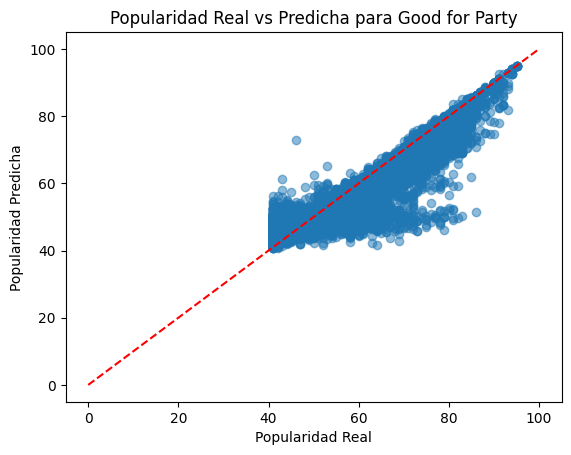

In [52]:
import matplotlib.pyplot as plt

segment = 'Good for Party'
subset = df[df[segment] == True]

plt.scatter(subset['Popularity'], subset['Predicted_Popularity'], alpha=0.5)
plt.xlabel('Popularidad Real')
plt.ylabel('Popularidad Predicha')
plt.title(f'Popularidad Real vs Predicha para {segment}')
plt.plot([0, 100], [0, 100], 'r--')  # Línea ideal
plt.show()
